學號：0111109069 姓名：李佳毓\
作業題目：上傳上課時分類練習的程式，以及w5影片的程式\
繳交期限：2022-10-15 09:30

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Import Data

In [2]:
from sklearn import datasets
iris = datasets.load_iris()

In [3]:
x = iris["data"][:, 0].reshape(-1,1)
y = (iris["target"] == 0).astype(np.int)

C:\Users\water\AppData\Local\Temp\ipykernel_3824\1495212577.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris["target"] == 0).astype(np.int)


# Logistic Regression

In [4]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver="lbfgs", C=.1, random_state=1)
log_reg.fit(x,y)

LogisticRegression(C=0.1, random_state=1)

In [5]:
y_pred = log_reg.predict(x)

# Metrics

In [6]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

## Confusion matrix

In [7]:
confusion_matrix(y, y_pred)

array([[94,  6],
       [11, 39]], dtype=int64)

## Precision

In [8]:
precision_score(y, y_pred)

0.8666666666666667

## Recall

In [9]:
recall_score(y, y_pred)

0.78

## F1 score 

In [10]:
f1_score(y, y_pred)

0.8210526315789474

# Decision Function ( Confidence scores)

In [11]:
# h = b +w1x1

log_reg.intercept_ + log_reg.coef_ * x[0]

array([[0.19645081]])

In [12]:
h = log_reg.decision_function(x)
h[0]

0.19645080546116134

## Threshold = 0.1

In [13]:
threshold = 0.1

y_pred_mod = (h > threshold).astype(int)
y_pred_mod

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## Metrics

In [14]:
confusion_matrix(y, y_pred_mod)

array([[95,  5],
       [14, 36]], dtype=int64)

In [15]:
precision_score(y, y_pred_mod)

0.8780487804878049

In [16]:
recall_score(y, y_pred_mod)

0.72

In [17]:
f1_score(y, y_pred_mod)

0.7912087912087912

## PR curve

In [18]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y, h)

In [19]:
thresholds

array([-0.87581675, -0.72263567, -0.56945459, -0.41627351, -0.26309243,
       -0.10991135,  0.04326973,  0.19645081,  0.34963188,  0.50281296,
        0.65599404,  0.80917512,  0.9623562 ,  1.11553728,  1.26871836,
        1.42189944])

In [20]:
precisions

array([0.625     , 0.67123288, 0.72307692, 0.79661017, 0.86538462,
       0.86956522, 0.86666667, 0.87804878, 0.875     , 0.90909091,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        ])

In [21]:
recalls

array([1.  , 0.98, 0.94, 0.94, 0.9 , 0.8 , 0.78, 0.72, 0.56, 0.4 , 0.32,
       0.22, 0.18, 0.1 , 0.08, 0.02, 0.  ])

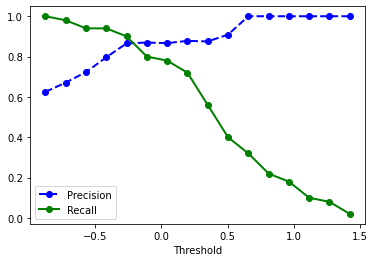

In [22]:
plt.plot(thresholds, precisions[:-1], "bo--", label="Precision", \
         linewidth=2)
plt.plot(thresholds, recalls[:-1], "go-", label="Recall", linewidth=2)
plt.xlabel("Threshold")
plt.legend()
plt.show()

C:\Users\water\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


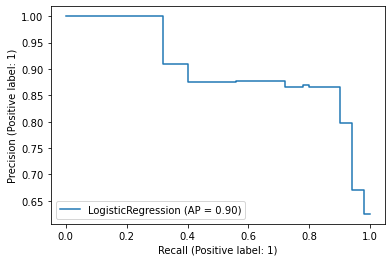

In [23]:
from sklearn.metrics import plot_precision_recall_curve

plot_precision_recall_curve(log_reg, x, y)
plt.show()

## ROC curve

In [24]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y, h)

In [25]:
fpr

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.04, 0.05, 0.06,
       0.06, 0.07, 0.12, 0.18, 0.24, 0.3 , 0.33, 0.45, 0.49, 0.58, 0.65,
       0.7 , 0.72, 0.8 , 0.83, 0.87, 0.89, 0.92, 0.95, 0.99, 1.  ])

In [26]:
tpr

array([0.  , 0.02, 0.08, 0.1 , 0.18, 0.22, 0.32, 0.4 , 0.56, 0.72, 0.78,
       0.8 , 0.9 , 0.94, 0.94, 0.98, 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ])

In [27]:
thresholds

array([ 2.42189944,  1.42189944,  1.26871836,  1.11553728,  0.9623562 ,
        0.80917512,  0.65599404,  0.50281296,  0.34963188,  0.19645081,
        0.04326973, -0.10991135, -0.26309243, -0.41627351, -0.56945459,
       -0.72263567, -0.87581675, -1.02899783, -1.33535998, -1.48854106,
       -1.64172214, -1.79490322, -1.9480843 , -2.10126538, -2.25444646,
       -2.40762754, -2.56080862, -2.86717077, -3.02035185, -3.63307617,
       -3.78625725, -4.09261941])

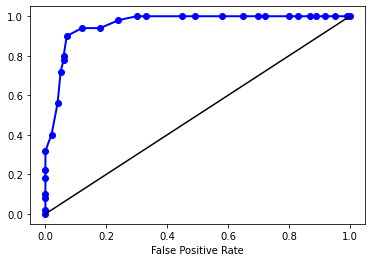

In [28]:
plt.plot(fpr, tpr, 'bo-', linewidth=2, label="roc_curve_plot")
plt.plot([0,1],[0,1], 'k-')
plt.xlabel("False Positive Rate")
plt.show()

C:\Users\water\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


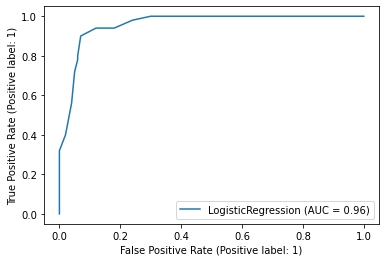

In [29]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(log_reg, x, y)
plt.show()

## AUC

In [30]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y, h)

0.9586